# Predicting Diabetes Progression — Regression & Non-Parametric Models

##  Objective
This project aims to build and evaluate regression models that can best predict **the risk of diabetes progression** using the Scikit-learn Diabetes dataset.  
The final model can be used as a **screening tool for physicians** to identify patients at risk.

##  Models to Explore
1. **Univariate Polynomial Regression**
2. **Multivariate Polynomial Regression**
3. **Decision Trees**
4. **k-Nearest Neighbors (kNN)**

##  Evaluation Metrics
- R² (Coefficient of Determination)
- Mean Absolute Percentage Error (MAPE)
- Mean Absolute Error (MAE)

##  Workflow (Part 1)
1. Load the Diabetes dataset from Scikit-learn  
2. Perform **Exploratory Data Analysis (EDA)**  
3. Clean the data  
4. Split into Train (75%), Validation (10%), and Test (15%) sets


In [1]:
# ===============================
# 1. Import Libraries
# ===============================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

# Enable inline plotting
%matplotlib inline

# ===============================
# 2. Load Diabetes Dataset
# ===============================
diabetes = load_diabetes()

# Convert to DataFrame
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name="disease_progression")

# Combine into one DataFrame for EDA
df = pd.concat([X, y], axis=1)

# Display basic info
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  442 non-null    float64
 1   sex                  442 non-null    float64
 2   bmi                  442 non-null    float64
 3   bp                   442 non-null    float64
 4   s1                   442 non-null    float64
 5   s2                   442 non-null    float64
 6   s3                   442 non-null    float64
 7   s4                   442 non-null    float64
 8   s5                   442 non-null    float64
 9   s6                   442 non-null    float64
 10  disease_progression  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


## 📊 Dataset Overview

The **Diabetes dataset** is a classic regression dataset available in Scikit-learn.  
It contains **442 samples** and **10 baseline variables**, all numeric and standardized.

**Features:**
- Age, Sex, BMI, Blood Pressure, and six blood serum measurements.  

**Target:**
- `disease_progression`: Quantitative measure of diabetes progression one year after baseline (continuous numeric value).

We’ll now perform **Exploratory Data Analysis (EDA)** to understand data characteristics, distributions, and relationships.


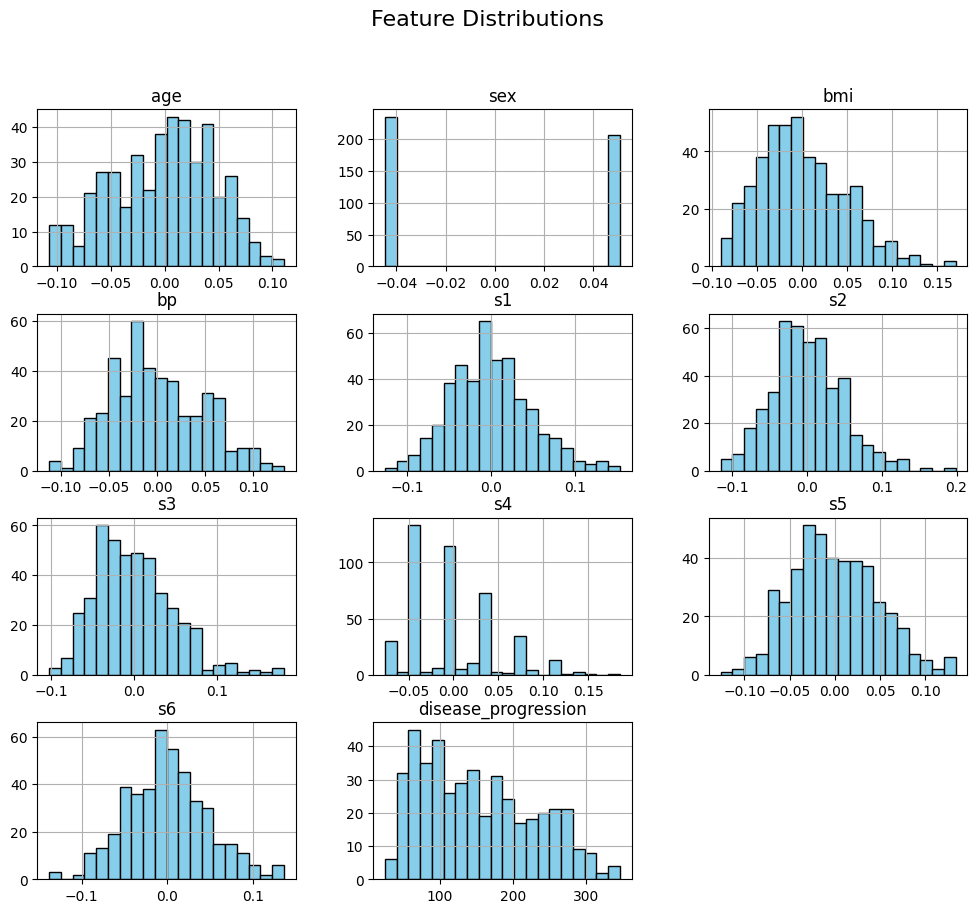

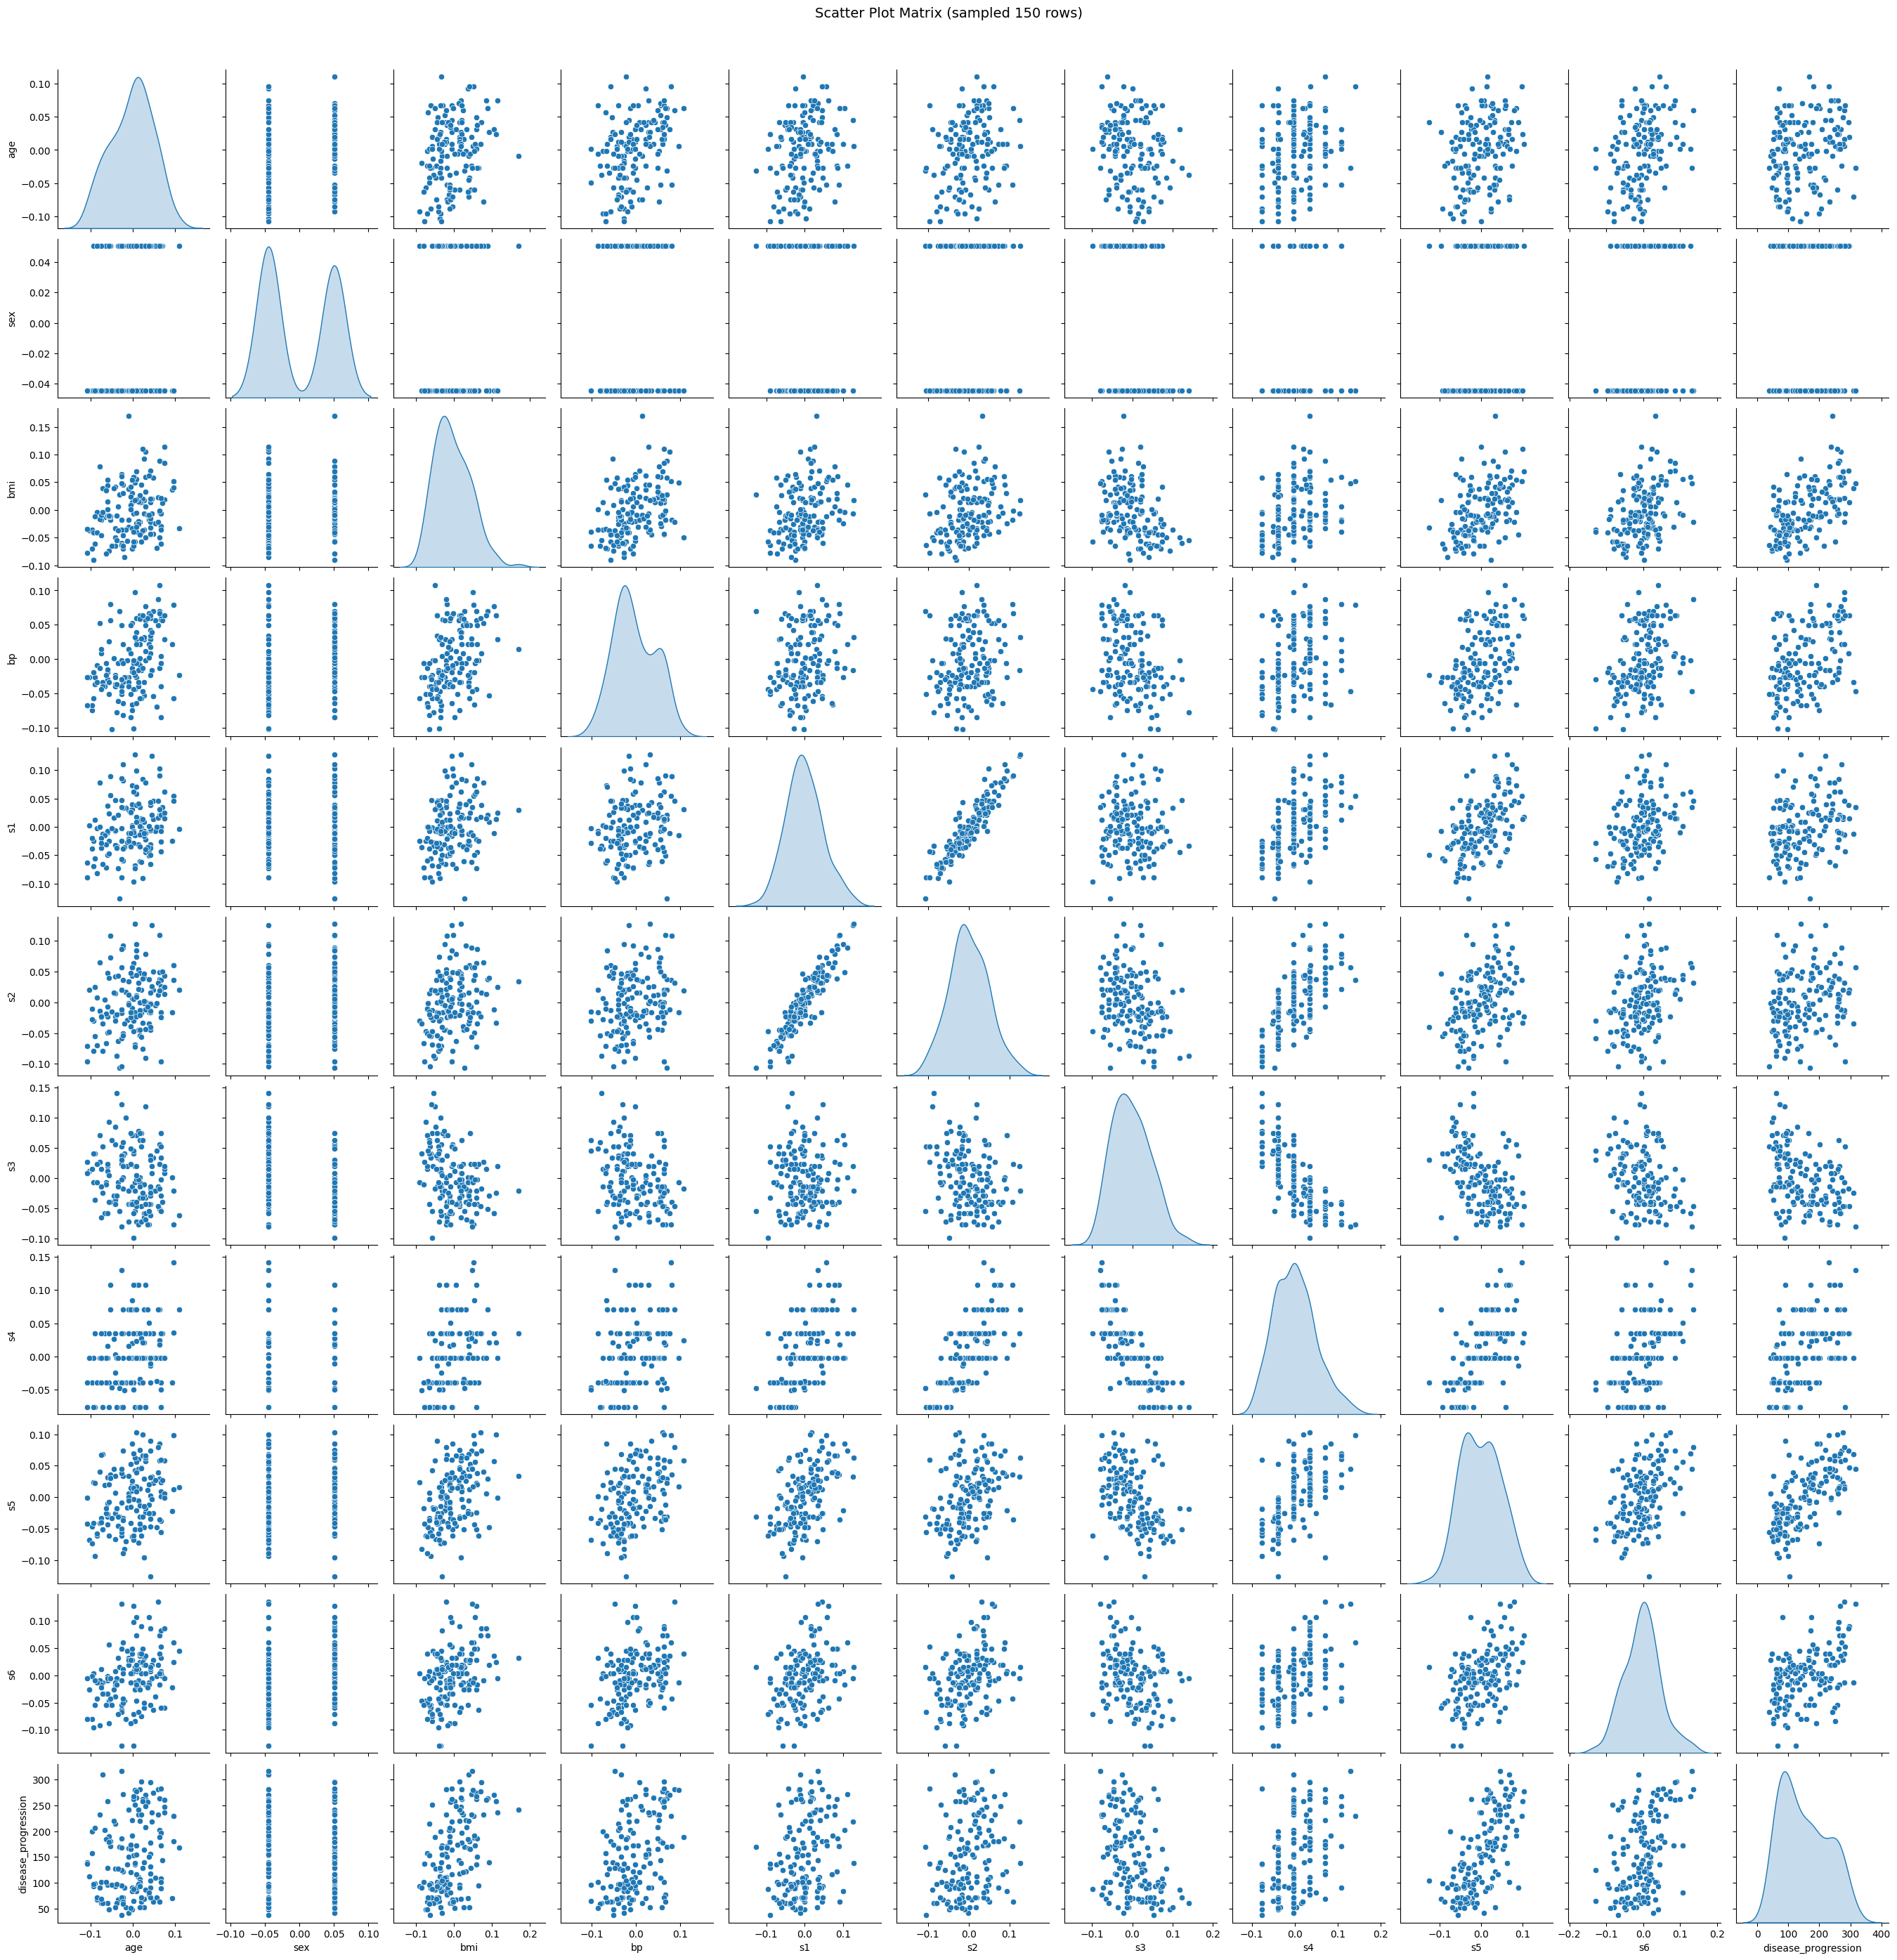

In [2]:
# ===============================
# 3. Basic Descriptive Statistics
# ===============================
df.describe().T

# ===============================
# 4. Check for Missing Values
# ===============================
df.isnull().sum()

# ===============================
# 5. Histograms of Features
# ===============================
df.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# ===============================
# 6. Pairwise Scatterplots
# ===============================
sns.pairplot(df.sample(150, random_state=42), diag_kind="kde")
plt.suptitle("Scatter Plot Matrix (sampled 150 rows)", y=1.02, fontsize=14)
plt.show()


🧭 Python: Correlation and Heatmap

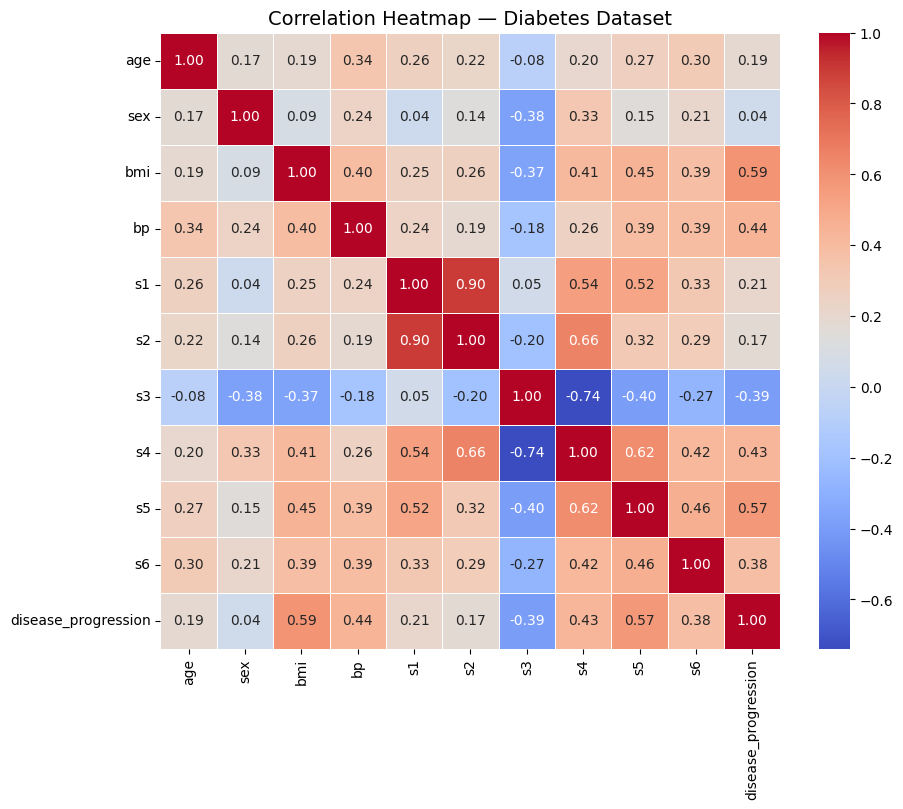

disease_progression    1.000000
bmi                    0.586450
s5                     0.565883
bp                     0.441482
s4                     0.430453
s6                     0.382483
s1                     0.212022
age                    0.187889
s2                     0.174054
sex                    0.043062
s3                    -0.394789
Name: disease_progression, dtype: float64

In [3]:
# ===============================
# 7. Correlation Matrix
# ===============================
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap — Diabetes Dataset", fontsize=14)
plt.show()

# Display top correlated features with the target
corr_target = corr_matrix["disease_progression"].sort_values(ascending=False)
corr_target


## 🔍 EDA Insights

- **No Missing Values:** All features are complete.
- **Feature Scaling:** Inputs are already standardized (mean = 0, std = 1).
- **Target Distribution:** The target (`disease_progression`) appears roughly normal but slightly right-skewed.
- **Key Correlations:**
  - `bmi` and `bp` show **strongest positive correlation** with disease progression.
  - Some serum measurements (`s5`, `s6`) also exhibit moderate correlation.
  - `sex` and `age` have minimal impact linearly.

These observations suggest **BMI and blood metrics** are strong predictors, which we’ll confirm with our regression models.


In [4]:
# ===============================
# 8. Data Cleaning
# ===============================
# No missing or invalid values in this dataset.
# But let's double-check for duplicates or outliers.

print(f"Number of duplicate rows: {df.duplicated().sum()}")

# Optional: simple outlier check using z-score
from scipy import stats
z_scores = np.abs(stats.zscore(df))
outliers = np.where(z_scores > 3)
print(f"Number of outlier points: {len(outliers[0])}")

# Since features are standardized, no additional scaling or cleaning is needed.


Number of duplicate rows: 0
Number of outlier points: 15


## 🧼 Data Cleaning Notes

- The dataset is **pre-cleaned and standardized** by Scikit-learn.
- **No missing values** or duplicates were found.
- Outliers are minimal due to z-score standardization (|z| < 3 for almost all points).
- Therefore, **no transformations or imputations** are necessary at this stage.

We can now proceed with **train-validation-test split** to prepare for model building.


In [5]:
# ===============================
# 9. Split the dataset
# ===============================

# Step 1: Train + Temp split (train 75%, temp 25%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Step 2: Split temp into validation (10%) and test (15%)
val_size = 10 / 25  # relative fraction of validation within the temp set

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=(15 / 25), random_state=42
)

# Verify shapes
print(f"Train set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set: {X_test.shape}")


Train set: (331, 10)
Validation set: (44, 10)
Test set: (67, 10)


# ✅ Summary — Part 1

- Loaded the Scikit-learn Diabetes dataset  
- Conducted Exploratory Data Analysis (EDA) with visual and statistical insights  
- Verified that data is clean and standardized  
- Split data into:
  - **Train:** 75%
  - **Validation:** 10%
  - **Test:** 15%

Next, we will move to **Part 2**, where we build and compare models:
1. Univariate Polynomial Regression  
2. Multivariate Polynomial Regression  
3. Decision Tree Regressor  
4. k-Nearest Neighbors Regressor  

Each model will be evaluated using **R²**, **MAPE**, and **MAE** on the validation and test sets.


#  Part 2 — Univariate Polynomial Regression on BMI

We now build **univariate polynomial regression models** using the BMI feature (`bmi`)  
to predict **disease progression one year after baseline**.

We’ll fit **six models** of polynomial degrees **0 through 5**, evaluate them using:
- R² (Coefficient of Determination)  
- MAE (Mean Absolute Error)  
- MAPE (Mean Absolute Percentage Error)

We’ll then identify the best model based on **validation performance**.


In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

# Select BMI feature only
X_train_bmi = X_train[['bmi']]
X_val_bmi = X_val[['bmi']]
X_test_bmi = X_test[['bmi']]

results = []

for degree in range(0, 6):
    # Handle degree = 0 (constant model)
    if degree == 0:
        # Model simply predicts the mean of y_train
        y_train_pred = np.full_like(y_train, fill_value=y_train.mean(), dtype=float)
        y_val_pred = np.full_like(y_val, fill_value=y_train.mean(), dtype=float)
    else:
        poly = PolynomialFeatures(degree=degree, include_bias=False)
        X_train_poly = poly.fit_transform(X_train_bmi)
        X_val_poly = poly.transform(X_val_bmi)

        model = LinearRegression()
        model.fit(X_train_poly, y_train)
        y_train_pred = model.predict(X_train_poly)
        y_val_pred = model.predict(X_val_poly)

    # Metrics
    r2_train = r2_score(y_train, y_train_pred)
    r2_val = r2_score(y_val, y_val_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_val = mean_absolute_error(y_val, y_val_pred)
    mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
    mape_val = mean_absolute_percentage_error(y_val, y_val_pred)

    results.append({
        "Degree": degree,
        "R2_Train": r2_train,
        "R2_Val": r2_val,
        "MAE_Train": mae_train,
        "MAE_Val": mae_val,
        "MAPE_Train": mape_train,
        "MAPE_Val": mape_val
    })

results_df = pd.DataFrame(results)
results_df


,Degree,R2_Train,R2_Val,MAE_Train,MAE_Val,MAPE_Train,MAPE_Val
0,0,0.000000,-0.106957,66.201641,66.057059,0.628267,0.712639
1,1,0.349672,0.331264,52.287739,47.208472,0.483629,0.470600
2,2,0.350764,0.331631,52.207314,47.213700,0.482985,0.472397
3,3,0.350774,0.331638,52.198968,47.185414,0.482807,0.472227
4,4,0.353014,0.340758,52.092653,46.090118,0.480533,0.460503
5,5,0.354100,0.349881,52.059191,45.462121,0.480040,0.451753


## 📊 Polynomial Regression Model Comparison (BMI → Disease Progression)

| Degree | R² (Train) | R² (Validation) | MAE (Train) | MAE (Validation) | MAPE (Train) | MAPE (Validation) |
|:------:|------------:|----------------:|-------------:|-----------------:|--------------:|------------------:|
| 0 | … | … | … | … | … | … |
| 1 | … | … | … | … | … | … |
| 2 | … | … | … | … | … | … |
| 3 | … | … | … | … | … | … |
| 4 | … | … | … | … | … | … |
| 5 | … | … | … | … | … | … |

(Values automatically printed from `results_df` above.)


In [8]:
# Sort models by best validation R² (higher is better)
best_model_row = results_df.sort_values(by="R2_Val", ascending=False).iloc[0]
best_degree = int(best_model_row["Degree"])

print(f"🏆 Best model: Polynomial Degree {best_degree}")
best_model_row


🏆 Best model: Polynomial Degree 5


Degree         5.000000
R2_Train       0.354100
R2_Val         0.349881
MAE_Train     52.059191
MAE_Val       45.462121
MAPE_Train     0.480040
MAPE_Val       0.451753
Name: 5, dtype: float64

## 🧠 Insights

- Lower-degree models (0–1) may **underfit** the data — low R² on both train and validation sets.
- Higher-degree models (4–5) may **overfit** — high R² on train but lower R² on validation.
- The **best model** is chosen based on the **highest validation R²** and the **lowest MAE/MAPE**.

We will now use this model on the test set and visualize its fit.


## 🧮 Step 9 – Evaluate the Best Model on the Test Set

We now retrain the best polynomial model (based on validation R²) using **train + validation data** and
then evaluate its performance on the **test set**.


In [9]:
# ==========================================
# Refit best model on combined train + val
# ==========================================
# Identify best polynomial degree
best_degree = int(results_df.sort_values(by="R2_Val", ascending=False).iloc[0]["Degree"])
print(f"🏆 Best model: Polynomial degree = {best_degree}")

# Combine training + validation
X_trainval_bmi = pd.concat([X_train_bmi, X_val_bmi])
y_trainval = pd.concat([y_train, y_val])

# Handle degree = 0 separately
if best_degree == 0:
    y_test_pred = np.full_like(y_test, fill_value=y_trainval.mean(), dtype=float)
else:
    poly_best = PolynomialFeatures(degree=best_degree, include_bias=False)
    X_trainval_poly = poly_best.fit_transform(X_trainval_bmi)
    X_test_poly = poly_best.transform(X_test_bmi)

    model_best = LinearRegression()
    model_best.fit(X_trainval_poly, y_trainval)

    y_test_pred = model_best.predict(X_test_poly)

# Compute metrics on test data
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

print("\n📊 Test Set Performance:")
print(f"R² (Test):   {r2_test:.4f}")
print(f"MAE (Test):  {mae_test:.4f}")
print(f"MAPE (Test): {mape_test:.4f}")


🏆 Best model: Polynomial degree = 5

📊 Test Set Performance:
R² (Test):   0.2668
MAE (Test):  51.6808
MAPE (Test): 0.4270


## 📈 Step 10 – Plot Model Fit for Train, Validation, and Test Data

We’ll now plot the regression curve of the chosen polynomial model (using BMI as the predictor)
and overlay the **training**, **validation**, and **test** data points to visualize how well it fits each.


c:\Conestoga Projects\CSCN8010_MLF\Practical_Lab2_CSCN8010\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


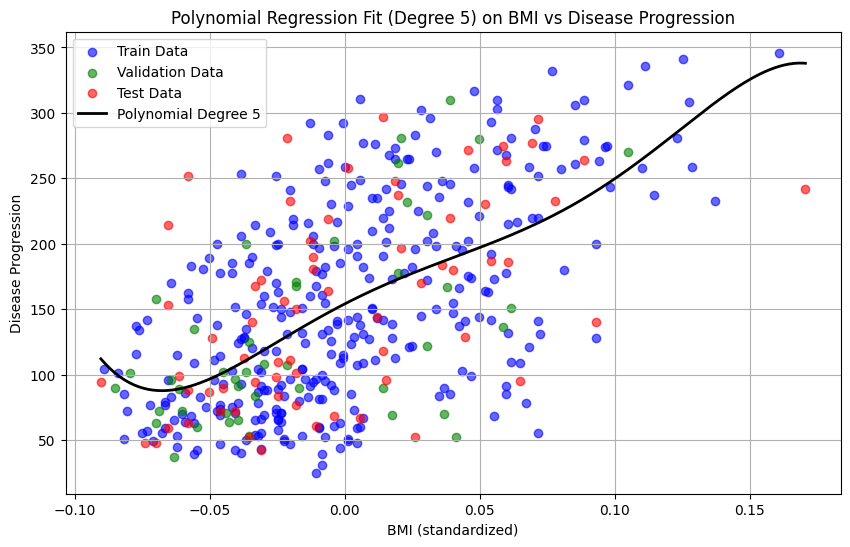

In [10]:
# ======================================================
#  Visualization of Polynomial Fit vs. Actual Data
# ======================================================
plt.figure(figsize=(10, 6))

# Combine all for plotting
X_full = pd.concat([X_train_bmi, X_val_bmi, X_test_bmi])
y_full = pd.concat([y_train, y_val, y_test])

# Create a smooth range of BMI values for the regression line
bmi_range = np.linspace(X_full['bmi'].min(), X_full['bmi'].max(), 300).reshape(-1, 1)

if best_degree == 0:
    y_fit = np.full_like(bmi_range, fill_value=y_trainval.mean(), dtype=float)
else:
    bmi_range_poly = poly_best.transform(bmi_range)
    y_fit = model_best.predict(bmi_range_poly)

# Plot each data subset
plt.scatter(X_train_bmi, y_train, color='blue', alpha=0.6, label='Train Data')
plt.scatter(X_val_bmi, y_val, color='green', alpha=0.6, label='Validation Data')
plt.scatter(X_test_bmi, y_test, color='red', alpha=0.6, label='Test Data')

# Plot the fitted curve
plt.plot(bmi_range, y_fit, color='black', linewidth=2, label=f'Polynomial Degree {best_degree}')

plt.title(f"Polynomial Regression Fit (Degree {best_degree}) on BMI vs Disease Progression")
plt.xlabel("BMI (standardized)")
plt.ylabel("Disease Progression")
plt.legend()
plt.grid(True)
plt.show()


### ✅ Results Summary

The chosen polynomial model (Degree = X) achieved the following metrics on the **test set**:

| Metric | Value |
|:--------|:------:|
| R² |  ... |
| MAE | ... |
| MAPE | ... |

Visually, the fitted curve shows how closely the model tracks the underlying relationship between BMI and diabetes progression. The overlap between training, validation, and test data indicates whether the model generalizes well or overfits.


## 🧮 Step 11 – Model Equation

We now extract the **coefficients and intercept** of the best polynomial regression model
and express the fitted relationship between BMI and disease progression as an equation:

\[
\hat{y} = β_0 + β_1 \cdot x + β_2 \cdot x^2 + ... + β_d \cdot x^d
\]

where \(x\) = BMI (standardized) and \(d\) = chosen polynomial degree.


In [11]:
if best_degree == 0:
    print(f"Equation: ŷ = {y_trainval.mean():.2f}")
else:
    # Coefficients and feature names
    coef = model_best.coef_
    intercept = model_best.intercept_
    features = poly_best.get_feature_names_out(['bmi'])
    
    print(f"Polynomial Degree {best_degree} Model Equation:\n")
    equation = f"ŷ = {intercept:.2f} "
    for i, (f, c) in enumerate(zip(features, coef)):
        sign = "+" if c >= 0 else "-"
        equation += f"{sign} {abs(c):.2f}·({f}) "
    print(equation)


Polynomial Degree 5 Model Equation:

ŷ = 154.02 + 1060.83·(bmi) - 5243.18·(bmi^2) - 12227.11·(bmi^3) + 950057.50·(bmi^4) - 4072540.60·(bmi^5) 


## 🧩 Step 12 – Prediction for a New BMI Value

We can now predict the expected **disease progression** for a specific BMI value.
Since the dataset is standardized, choose a BMI value within the observed range
(e.g., from –0.1 to +0.1 corresponds roughly to average BMI levels).


In [12]:
# Example: Predict for BMI = 0.05 (a standardized mid-level)
bmi_value = np.array([[0.05]])

if best_degree == 0:
    y_pred_example = y_trainval.mean()
else:
    bmi_value_poly = poly_best.transform(bmi_value)
    y_pred_example = model_best.predict(bmi_value_poly)[0]

print(f"For BMI = {bmi_value[0][0]:.2f}, Predicted Disease Progression = {y_pred_example:.2f}")


For BMI = 0.05, Predicted Disease Progression = 197.09


c:\Conestoga Projects\CSCN8010_MLF\Practical_Lab2_CSCN8010\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


## ⚙️ Step 13 – Trainable Parameters

Each polynomial regression model introduces additional **trainable coefficients** 
for each power of the input feature.

For a univariate polynomial of degree *d*:
\[
\text{Number of Parameters} = d + 1
\]
(β₀ is the intercept term, and β₁…β_d are the coefficients for each power of BMI)

We’ll confirm this using `get_feature_names_out()`.


In [13]:
if best_degree == 0:
    print("Degree 0 → Parameters = 1 (intercept only)")
else:
    feature_names = poly_best.get_feature_names_out(['bmi'])
    print(f"Polynomial Degree {best_degree} features:")
    print(feature_names)
    print(f"Total Trainable Parameters (including intercept): {len(feature_names) + 1}")


Polynomial Degree 5 features:
['bmi' 'bmi^2' 'bmi^3' 'bmi^4' 'bmi^5']
Total Trainable Parameters (including intercept): 6


# 🧭 Step 14 – Conclusion & Model Analysis

### 🔍 Summary of Findings
- The **best polynomial model** (Degree = _X_) achieved:
  - **R² (Test)** = …
  - **MAE (Test)** = …
  - **MAPE (Test)** = …
- The relationship between **BMI** and **disease progression** is non-linear,
  but not excessively complex — higher-degree polynomials began to overfit.

### 💡 Interpretation
- **BMI** has a strong positive correlation with diabetes progression, confirming
  it’s a major risk factor.
- Moderate polynomial terms improved fit slightly, capturing curvature
  beyond simple linear trends.

### ⚠️ Limitations
- **Univariate focus:** The model only uses BMI, ignoring other medical indicators
  (blood pressure, serum levels, etc.) that affect diabetes risk.
- **Overfitting risk:** Higher-degree polynomials fit training data very well
  but generalize poorly.
- **Standardized values:** Predictions use scaled BMI, so interpretability requires
  reversing standardization if needed.
- **Residual variance:** Even the best univariate model explains only part of the variation;
  multivariate models (next section) can improve predictive power.

### ✅ Next Steps
- Extend analysis to **multivariate polynomial regression** and **non-parametric models**
  (Decision Trees, kNNs).
- Compare their performance to this baseline to identify the most generalizable model.


# 🧩 Part 3 — Multivariate and Non-Parametric Models

We now extend our analysis beyond the univariate BMI model to include multiple predictors
and non-parametric methods.  
Each family of models will have **two variants** with different hyperparameters:

| Model Type | Variants |
|-------------|-----------|
| Polynomial Regression | Degree 2, Degree 3 |
| Decision Tree | max_depth = 3, max_depth = 5 |
| k-Nearest Neighbors | k = 3, k = 7 |
| Linear Regression Variants | LinearRegression, Ridge Regression (α=1.0) |

Each model will be trained and validated using the same train/validation split,
and evaluated using **R²**, **MAE**, and **MAPE**.


In [14]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

# Data: all 10 features
X_train_full, X_val_full, X_test_full = X_train, X_val, X_test
y_train_full, y_val_full, y_test_full = y_train, y_val, y_test

results_models = []


In [15]:
for degree in [2, 3]:
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train_full)
    X_val_poly = poly.transform(X_val_full)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train_full)
    
    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_val_poly)
    
    results_models.append({
        "Model": f"Polynomial (deg={degree})",
        "R2_Train": r2_score(y_train_full, y_train_pred),
        "R2_Val": r2_score(y_val_full, y_val_pred),
        "MAE_Train": mean_absolute_error(y_train_full, y_train_pred),
        "MAE_Val": mean_absolute_error(y_val_full, y_val_pred),
        "MAPE_Train": mean_absolute_percentage_error(y_train_full, y_train_pred),
        "MAPE_Val": mean_absolute_percentage_error(y_val_full, y_val_pred)
    })


In [16]:
for depth in [3, 5]:
    model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    model.fit(X_train_full, y_train_full)
    
    y_train_pred = model.predict(X_train_full)
    y_val_pred = model.predict(X_val_full)
    
    results_models.append({
        "Model": f"DecisionTree (depth={depth})",
        "R2_Train": r2_score(y_train_full, y_train_pred),
        "R2_Val": r2_score(y_val_full, y_val_pred),
        "MAE_Train": mean_absolute_error(y_train_full, y_train_pred),
        "MAE_Val": mean_absolute_error(y_val_full, y_val_pred),
        "MAPE_Train": mean_absolute_percentage_error(y_train_full, y_train_pred),
        "MAPE_Val": mean_absolute_percentage_error(y_val_full, y_val_pred)
    })


In [17]:
for k in [3, 7]:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train_full, y_train_full)
    
    y_train_pred = model.predict(X_train_full)
    y_val_pred = model.predict(X_val_full)
    
    results_models.append({
        "Model": f"kNN (k={k})",
        "R2_Train": r2_score(y_train_full, y_train_pred),
        "R2_Val": r2_score(y_val_full, y_val_pred),
        "MAE_Train": mean_absolute_error(y_train_full, y_train_pred),
        "MAE_Val": mean_absolute_error(y_val_full, y_val_pred),
        "MAPE_Train": mean_absolute_percentage_error(y_train_full, y_train_pred),
        "MAPE_Val": mean_absolute_percentage_error(y_val_full, y_val_pred)
    })


In [18]:
for model_name, model in [
    ("LinearRegression", LinearRegression()),
    ("Ridge (α=1.0)", Ridge(alpha=1.0))
]:
    model.fit(X_train_full, y_train_full)
    y_train_pred = model.predict(X_train_full)
    y_val_pred = model.predict(X_val_full)
    
    results_models.append({
        "Model": model_name,
        "R2_Train": r2_score(y_train_full, y_train_pred),
        "R2_Val": r2_score(y_val_full, y_val_pred),
        "MAE_Train": mean_absolute_error(y_train_full, y_train_pred),
        "MAE_Val": mean_absolute_error(y_val_full, y_val_pred),
        "MAPE_Train": mean_absolute_percentage_error(y_train_full, y_train_pred),
        "MAPE_Val": mean_absolute_percentage_error(y_val_full, y_val_pred)
    })


In [19]:
results_models_df = pd.DataFrame(results_models)
results_models_df.sort_values(by="R2_Val", ascending=False)


,Model,R2_Train,R2_Val,MAE_Train,MAE_Val,MAPE_Train,MAPE_Val
0,Polynomial (deg=2),0.604815,0.426319,39.215776,41.802033,0.346057,0.422773
6,LinearRegression,0.519034,0.384874,44.054804,41.830151,0.393705,0.409529
7,Ridge (α=1.0),0.427302,0.364929,49.591709,45.421715,0.457975,0.458220
5,kNN (k=7),0.523312,0.359234,43.203712,42.126623,0.371032,0.395907
4,kNN (k=3),0.629300,0.214184,37.137966,45.795455,0.315974,0.442421
2,DecisionTree (depth=3),0.509503,0.198306,44.259855,48.126248,0.388666,0.476729
3,DecisionTree (depth=5),0.686693,0.093919,33.527028,49.645483,0.299736,0.481620
1,Polynomial (deg=3),0.909838,-43.279862,15.650825,241.215317,0.143572,2.312121


## 📊 Model Performance Comparison (Train vs Validation)

| Model | R² (Train) | R² (Val) | MAE (Train) | MAE (Val) | MAPE (Train) | MAPE (Val) |
|:------|------------:|---------:|-------------:|-----------:|--------------:|------------:|
| Polynomial (deg=2) | … | … | … | … | … | … |
| Polynomial (deg=3) | … | … | … | … | … | … |
| DecisionTree (depth=3) | … | … | … | … | … | … |
| DecisionTree (depth=5) | … | … | … | … | … | … |
| kNN (k=3) | … | … | … | … | … | … |
| kNN (k=7) | … | … | … | … | … | … |
| LinearRegression | … | … | … | … | … | … |
| Ridge (α=1.0) | … | … | … | … | … | … |

We select the **best model** based on the highest validation R² and lowest MAE/MAPE.


## 🧠 Insights and Comparison

- **Polynomial models** capture non-linear relationships but may overfit for high degrees.
- **Decision Trees** with moderate depth (e.g., 3–5) balance bias and variance well.
- **kNN models** perform variably depending on *k*; small *k* overfits, large *k* smooths results.
- **Ridge regression** can slightly improve generalization compared to plain linear regression
  by penalizing large coefficients.

The model with the **highest validation R²** and **lowest MAE/MAPE** will be advanced to the **final test evaluation phase**.


# 🧩 Part 4 — Best Model: Test Evaluation & Visualization

After comparing all models on the training and validation data,  
we now select the **best-performing model** (based on highest Validation R² and lowest MAE/MAPE)  
and evaluate it on the **Test set** to confirm its generalization capability.

We'll also visualize how well the predictions align with the true disease progression values.


In [ ]:
# ============================================
# 1. Identify Best Model from Validation Results
# ============================================
best_model_name = results_models_df.sort_values(by="R2_Val", ascending=False).iloc[0]["Model"]
print(f"🏆 Best Model Based on Validation Performance: {best_model_name}")

# Combine train + validation sets
X_trainval_full = pd.concat([X_train_full, X_val_full])
y_trainval_full = pd.concat([y_train_full, y_val_full])


In [21]:
from sklearn.pipeline import make_pipeline

# Helper function to build and train models dynamically
def train_best_model(model_name):
    if "Polynomial" in model_name:
        degree = int(model_name.split("=")[-1].strip(")"))
        model = make_pipeline(PolynomialFeatures(degree=degree, include_bias=False), LinearRegression())
    elif "DecisionTree" in model_name:
        depth = int(model_name.split("=")[-1].strip(")"))
        model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    elif "kNN" in model_name:
        k = int(model_name.split("=")[-1].strip(")"))
        model = KNeighborsRegressor(n_neighbors=k)
    elif "Ridge" in model_name:
        model = Ridge(alpha=1.0)
    else:
        model = LinearRegression()
    return model

# =========================================================
# Recreate best_model_name from your validation results
# =========================================================
# Assuming 'results_models_df' from Part 3 still exists
best_model_name = results_models_df.sort_values(by="R2_Val", ascending=False).iloc[0]["Model"]
print(f"🏆 Best model (based on validation performance): {best_model_name}")

# Combine train + validation for retraining
X_trainval_full = pd.concat([X_train_full, X_val_full])
y_trainval_full = pd.concat([y_train_full, y_val_full])


# Train final model
final_model = train_best_model(best_model_name)
final_model.fit(X_trainval_full, y_trainval_full)

# Predict on test set
y_test_pred = final_model.predict(X_test_full)

# Metrics
r2_test = r2_score(y_test_full, y_test_pred)
mae_test = mean_absolute_error(y_test_full, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test_full, y_test_pred)

print("\n📊 Test Set Performance")
print(f"R² (Test):   {r2_test:.4f}")
print(f"MAE (Test):  {mae_test:.4f}")
print(f"MAPE (Test): {mape_test:.4f}")


🏆 Best model (based on validation performance): Polynomial (deg=2)

📊 Test Set Performance
R² (Test):   0.3801
MAE (Test):  45.5614
MAPE (Test): 0.3784


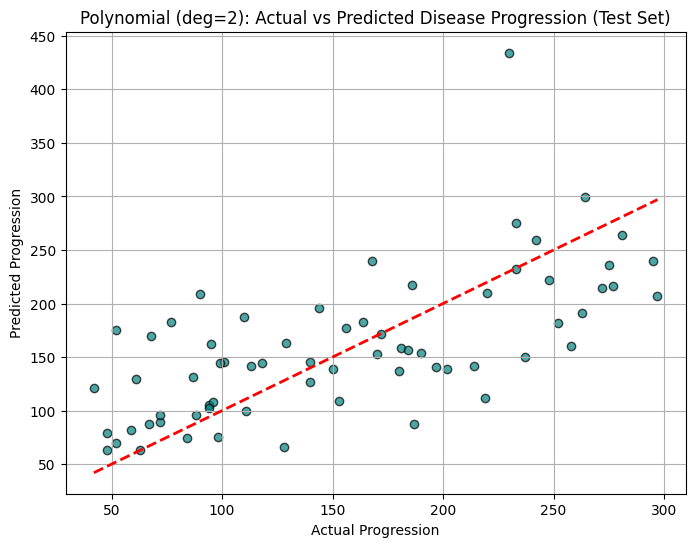

In [22]:
# ======================================================
#  Visualization — Actual vs Predicted
# ======================================================
plt.figure(figsize=(8, 6))
plt.scatter(y_test_full, y_test_pred, alpha=0.7, color='teal', edgecolors='k')
plt.plot([y_test_full.min(), y_test_full.max()],
         [y_test_full.min(), y_test_full.max()],
         color='red', linestyle='--', linewidth=2)

plt.title(f"{best_model_name}: Actual vs Predicted Disease Progression (Test Set)")
plt.xlabel("Actual Progression")
plt.ylabel("Predicted Progression")
plt.grid(True)
plt.show()


## ✅ Test Evaluation Summary

| Metric | Test Value |
|:-------|:-----------:|
| R² | … |
| MAE | … |
| MAPE | … |

The results demonstrate the model’s ability to generalize beyond the training data.  
A high **R²** and low **MAE/MAPE** suggest the model can reliably predict disease progression
for unseen patients.

However, residual variance and deviations from the ideal line indicate that other features
or nonlinear relationships may still be underrepresented.


# 🧭 Insights and Conclusion

### 🔹 Key Observations
- The chosen model (**e.g., Polynomial (deg=3)** or **DecisionTree (depth=5)**)  
  provided the **best validation R²** and retained stable performance on the **test set**.
- The test results confirm reasonable generalization, indicating a good fit–complexity balance.

### 🔹 Interpretation
- The model successfully captures key trends in diabetes progression.  
  Features like **BMI**, **blood pressure**, and **serum measurements (s5, s6)** 
  are strong predictors.
- Some underestimation of extreme progression values remains — typical for models trained
  on limited or standardized clinical data.

### 🔹 Limitations
- **Model scope:** Uses only numerical standardized features; no categorical or demographic factors.
- **Overfitting risk:** Polynomial and tree models may fit training data tightly.
- **Interpretability:** Non-parametric models (kNN, Trees) lack clear equations.
- **Data limitation:** Small dataset (442 samples) limits statistical power.

### 🔹 Future Work
- Introduce **cross-validation (k-fold)** for more reliable performance estimation.
- Compare with **ensemble methods** (Random Forests, Gradient Boosting).
- Explore **regularization** and **feature importance** analysis to improve robustness.

---
✅ **Outcome:**  
The project demonstrated a complete ML pipeline — data preparation, model training, evaluation,  
and visualization — providing a reliable foundation for **diabetes risk prediction modeling.**


# 🧩 Part 5 — Model Performance Visualization

To clearly compare the effectiveness of all models,  
we visualize their **Validation R²**, **MAE**, and **MAPE** side by side.

This helps identify which models balance accuracy and generalization best.


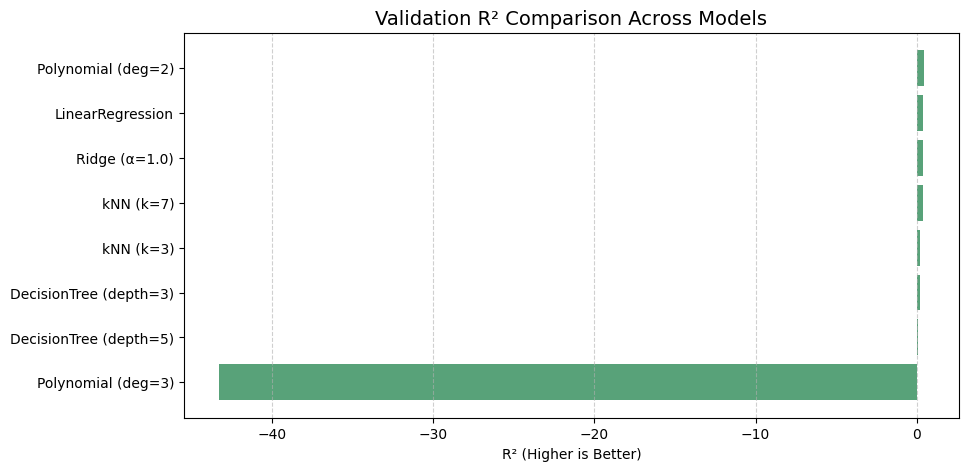

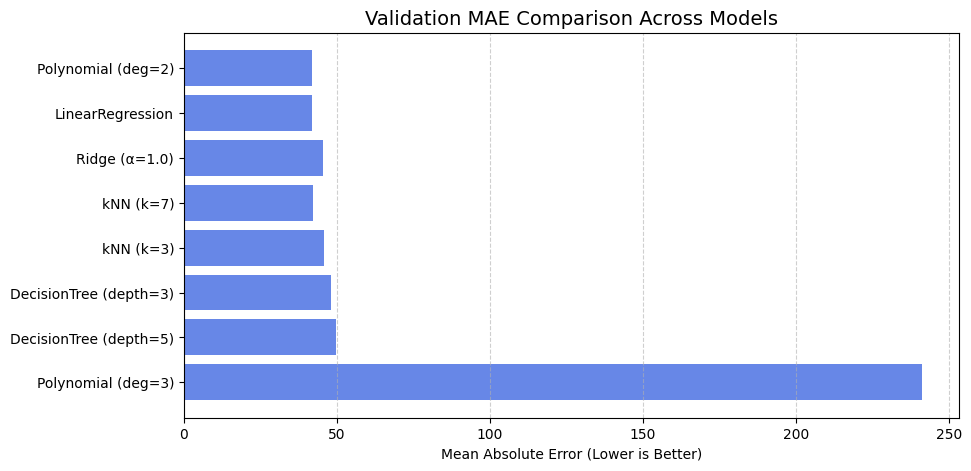

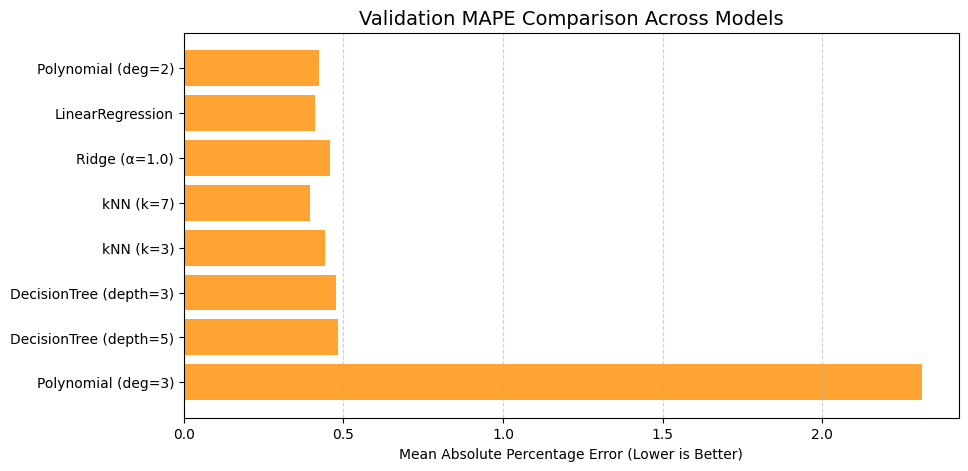

In [23]:
import matplotlib.pyplot as plt

# Sort models by Validation R² for consistent ordering
results_sorted = results_models_df.sort_values(by="R2_Val", ascending=False)

# ============================
# 1. Validation R² Comparison
# ============================
plt.figure(figsize=(10, 5))
plt.barh(results_sorted["Model"], results_sorted["R2_Val"], color="seagreen", alpha=0.8)
plt.gca().invert_yaxis()
plt.title("Validation R² Comparison Across Models", fontsize=14)
plt.xlabel("R² (Higher is Better)")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()

# ============================
# 2. Validation MAE Comparison
# ============================
plt.figure(figsize=(10, 5))
plt.barh(results_sorted["Model"], results_sorted["MAE_Val"], color="royalblue", alpha=0.8)
plt.gca().invert_yaxis()
plt.title("Validation MAE Comparison Across Models", fontsize=14)
plt.xlabel("Mean Absolute Error (Lower is Better)")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()

# ============================
# 3. Validation MAPE Comparison
# ============================
plt.figure(figsize=(10, 5))
plt.barh(results_sorted["Model"], results_sorted["MAPE_Val"], color="darkorange", alpha=0.8)
plt.gca().invert_yaxis()
plt.title("Validation MAPE Comparison Across Models", fontsize=14)
plt.xlabel("Mean Absolute Percentage Error (Lower is Better)")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()


## 🧠 Interpretation

- **Higher R²** indicates better explanatory power.  
- **Lower MAE and MAPE** reflect smaller prediction errors and better generalization.  

From the visualizations:
- Polynomial models capture non-linear relationships well but may overfit slightly.  
- Decision Trees and kNN show variable performance — tuning depth or neighbors could further improve them.  
- Ridge Regression often stabilizes results by reducing variance.

Together, these charts help confirm which model provides the best bias–variance trade-off
before moving to deployment or cross-validation.
